In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import datetime

# from bq_helper import BigQueryHelper

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from matplotlib import dates as md
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)


Acknowledging the correction regarding the origin of our data exclusively being from ground stations, sourced from NOAA archives, and the strategic goal to align this dataset with satellite data for future compatibility, here's a revised summary that better reflects these points and your research approach:

### Revised Summary of Data Origin and Selection Rationale

#### Origin of Data

The dataset originates from ground-based weather stations and is archived by the National Oceanic and Atmospheric Administration (NOAA). This dataset includes comprehensive meteorological observations such as temperature, precipitation, wind speed, and other atmospheric conditions relevant to wildfire prediction. The use of ground station data provides high-quality, localized measurements of environmental variables critical to understanding the conditions leading to wildfires.

#### Goal for Compatibility with Satellite Data

The overarching goal is to ensure the dataset and resulting wildfire prediction model are compatible with satellite data. This approach aims to leverage the broader coverage and continuous monitoring capabilities of satellites, enhancing the model's applicability and scalability. After developing and validating the prediction model with ground-based data, the intention is to adapt or extend the model to incorporate satellite data. This step will broaden the predictive capabilities to cover larger areas and possibly improve the model's performance by integrating diverse data sources.

#### Rationale for Data Selection

Data selection is driven by the relevance of specific variables to wildfire ignition and propagation:

- **Temperature (Average, Maximum, Minimum)**: Critical for assessing the dryness of vegetation and the likelihood of fire ignition under high-temperature conditions.
- **Precipitation**: Provides insights into moisture levels in the soil and vegetation, with lower levels indicating higher wildfire risk.
- **Snow Depth**: Offers information on seasonal moisture availability and ground wetness, influencing long-term vegetation moisture content.
- **Wind Speed (Including Maximum Sustained Wind Speed and Gusts)**: Essential for understanding the potential for rapid fire spread.
- **Dew Point**: Reflects atmospheric moisture levels, affecting vegetation dryness and fire susceptibility.
- **Fog**: Indicates high humidity levels, which can reduce wildfire risk by maintaining moisture in vegetation.
- **Thunder (Lightning)**: Identifies potential natural ignition sources for wildfires.

#### Significance and Utilization in Wildfire Prediction

The selected variables are foundational for developing a predictive model of wildfire risk, focusing on:

- **Environmental Monitoring**: Ground station data provides precise, localized measurements of key variables influencing wildfire risk.
- **Model Development and Validation**: This data is used to develop and validate a predictive model of wildfire risk, laying the groundwork for future integration with satellite data.
- **Future Integration with Satellite Data**: By ensuring the model is compatible with satellite data, the research aims to expand the model’s applicability, enhancing its utility for regional or global wildfire prediction efforts.

### Conclusion

The research strategically utilizes ground station data from NOAA as a reliable and precise source of environmental measurements for wildfire prediction. The goal is to create a model that not only serves immediate predictive needs but is also adaptable to incorporate satellite data, thus ensuring its future relevance and applicability in a changing technological landscape. This dual-focused approach maximizes the utility of available ground-based data while preparing for the integration of satellite observations to enhance wildfire prediction and management efforts globally.

In [23]:
# !pip install 
#cufflinks
#plotly 
!pip install geopy osmnx


     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ---------------------------------------- 51.5/51.5 kB 2.6 MB/s eta 0:00:00
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/104.3 kB ? eta -:--:--
   ---------------------------------------- 104.3/104.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------ --------------------------- 0.4/1.1 MB 11.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.1 MB 4.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.1 MB 4.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.1 

In [11]:
# ! pip install --upgrade google-cloud-bigquery
# ! pip install -e git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper
# ! pip install scikit-learn
# !pip install matplotlib
# ! pip install cufflinks db-dtypes


In [2]:
!pwd

/i/thesis/Thesis_Work/Data


In [3]:
from google.cloud import bigquery
from google.oauth2 import service_account

# Path to your service account key file
key_path = "../Secrets/bigquery-uae-test-2022-bc99f4196332.json"

# Load credentials from the service account key file
credentials = service_account.Credentials.from_service_account_file(key_path)

# Use the credentials to authenticate the client
client = bigquery.Client(credentials=credentials)


In [4]:
from google.cloud import bigquery

# Instantiate the BigQuery client
# client = bigquery.Client()
client = bigquery.Client.from_service_account_json(key_path)

# Identify stations in Morocco
query = """
SELECT
    usaf AS station_number,
    name,
    country,
    lat,
    lon
FROM
    `bigquery-public-data.noaa_gsod.stations`
WHERE
    country = 'MO'
"""
morocco_stations = client.query(query).to_dataframe()
morocco_stations

,station_number,name,country,lat,lon
0,601154,SIDI SLIMANE &,MO,34.233,-6.050
1,601250,TOUAHAR,MO,34.200,-3.833
2,601300,RABAT,MO,34.000,-6.833
3,601360,SIDI SLIMANE,MO,34.233,-6.050
4,601400,FES,MO,34.033,-4.983
...,...,...,...,...,...
61,603400,NADOR-AROUI,MO,34.983,-3.017
62,603180,SANIAT RMEL,MO,35.594,-5.320
63,601460,MOHAMMEDIA,MO,33.717,-7.400
64,601200,KENITRA (RMAFB),MO,34.300,-6.600


In [104]:
morocco_stations.to_feather('Data/morocco_stations.feather')

In [6]:
# # Query weather data for a specific station in Morocco
# year=2022
# query = f"""
# SELECT
#     *
# FROM
#     `bigquery-public-data.noaa_gsod.gsod{year}`
# WHERE
#     stn in  '601200'  
# """
# weather_data = client.query(query).to_dataframe()

# weather_data

In [34]:
# Query weather data for a all station in Morocco
year=2010
query = f"""
SELECT
    *
FROM
    `bigquery-public-data.noaa_gsod.gsod{year}`
WHERE
   stn IN (SELECT
            usaf
            FROM
            `bigquery-public-data.noaa_gsod.stations`
            WHERE
            country = 'MO')
"""
weather_data = client.query(query).to_dataframe()

weather_data

,stn,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,602100,99999,2010,04,29,80.3,14,39.8,14,9999.9,...,None,99.99,None,999.9,0,1,0,0,0,0
1,602650,99999,2010,02,14,54.0,24,35.0,24,9999.9,...,None,99.99,None,999.9,0,1,1,0,0,0
2,602100,99999,2010,04,25,78.8,13,39.1,13,9999.9,...,None,99.99,None,999.9,0,1,0,0,0,0
3,601010,99999,2010,11,07,60.0,24,53.5,24,9999.9,...,None,99.99,None,999.9,0,1,0,0,0,0
4,601150,99999,2010,04,21,60.7,23,57.4,23,1013.0,...,None,99.99,None,999.9,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76459,999999,12946,2010,08,16,96.9,9,73.3,9,1012.5,...,*,0.00,I,999.9,0,0,0,0,0,0
76460,999999,53848,2010,12,04,54.2,24,46.3,24,1019.7,...,*,0.00,I,999.9,0,0,0,0,0,0
76461,999999,53848,2010,12,09,35.8,24,17.7,24,1021.6,...,*,0.00,I,999.9,0,0,0,0,0,0
76462,999999,53848,2010,06,08,88.6,24,62.8,24,1017.4,...,*,0.00,I,999.9,0,0,0,0,0,0


In [36]:
# Query weather data for all stations in Morocco
weather_data = pd.DataFrame()  # Initialize an empty DataFrame

for year in range(2010, 2023):
    query = f"""
    SELECT
        *
    FROM
        `bigquery-public-data.noaa_gsod.gsod{year}`
    WHERE
        stn IN (SELECT
                    usaf
                    FROM
                    `bigquery-public-data.noaa_gsod.stations`
                    WHERE
                    country = 'MO')
    """
    wd = client.query(query).to_dataframe()
    weather_data = pd.concat([weather_data, wd])  # Concatenate the weather data for each year

weather_data.reset_index(drop=True, inplace=True)  # Reset the index of the concatenated data


In [57]:
# !mkdir Data/Weather_Noaa
import os
os.makedirs('Data/Weather_Noaa', exist_ok=True)
os.makedirs('Data/Weather_Noaa/Morocco', exist_ok=True)


In [45]:
weather_data[weather_data["date"].isna()]


,stn,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,...,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,date


In [44]:
weather_data['date'] = pd.to_datetime(weather_data[['year', 'mo', 'da']].rename(columns={'mo': 'month', 'da': 'day'}), format='%Y-%m-%d', errors='coerce')

In [58]:
weather_data.to_parquet('Data/Weather_Noaa/weather_data_morocco_2010-2023.parquet')  # Save the weather data to a Parquet file

In [103]:
# Selecting the specified columns and renaming them
wdf_selected = weather_data[['temp', 'max', 'min', 'prcp', 'sndp', 'wdsp', 'mxpsd', 'gust', 'dewp', 'fog', 'thunder','stn','date']].copy()

# Renaming the columns
wdf_selected.columns = [
    'average_temperature',
    'maximum_temperature',
    'minimum_temperature',
    'precipitation',
    'snow_depth',
    'wind_speed',
    'maximum_sustained_wind_speed',
    'wind_gust',
    'dew_point',
    'fog',
    'thunder',
    'station_number',
    'date',
]
wdf_selected
# Now wdf_selected contains only the data that can be provided by satellite, with columns renamed


,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_speed,maximum_sustained_wind_speed,wind_gust,dew_point,fog,thunder,station_number,date
0,59.9,72.3,49.8,0.00,999.9,5.2,12.0,999.9,53.3,0,1,601350,2010-03-05
1,72.7,79.5,66.7,0.00,999.9,8.1,18.1,999.9,63.9,0,1,601560,2010-07-02
2,59.2,68.5,48.4,0.00,999.9,5.8,11.1,999.9,53.8,0,0,601350,2010-11-14
3,62.2,74.5,52.9,0.00,999.9,8.6,15.0,999.9,54.4,0,0,601150,2010-10-25
4,65.4,68.9,58.3,0.00,999.9,7.9,12.0,999.9,53.8,0,0,603180,2010-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461420,24.6,36.0,14.0,0.37,999.9,999.9,999.9,999.9,9999.9,0,0,999999,2022-11-04
1461421,36.7,53.4,20.7,0.00,999.9,999.9,999.9,999.9,9999.9,0,0,999999,2022-03-17
1461422,37.2,41.5,32.4,0.00,999.9,999.9,999.9,999.9,9999.9,0,0,999999,2022-05-02
1461423,27.0,54.5,18.7,0.00,999.9,999.9,999.9,999.9,9999.9,0,0,999999,2022-11-03


In [61]:
import pandas as pd

# Assuming weather_data and morocco_stations are already loaded DataFrames

# Ensure the 'stn' and 'station_number' are of the same data type
wdf_selected['station_number'] = wdf_selected['station_number'].astype(str)
morocco_stations = morocco_stations.rename(columns={'name': 'station_name'})

morocco_stations['station_number'] = morocco_stations['station_number'].astype(str)

# Remove duplicates in morocco_stations (keeping the first occurrence)
morocco_stations = morocco_stations.drop_duplicates(subset=['station_number'])

# Merge the DataFrames on 'stn' from weather_data and 'station_number' from morocco_stations
wdf_selected = pd.merge(wdf_selected, morocco_stations, how='left', on='station_number')

wdf_selected
# The merged_data DataFrame now contains weather data along with matching station details for each row in wdf_selected

,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_speed,maximum_sustained_wind_speed,wind_gust,dew_point,fog,thunder,station_number,date,station_name,country,lat,lon
0,59.9,72.3,49.8,0.00,999.9,5.2,12.0,999.9,53.3,0,1,601350,2010-03-05,SALE,MO,34.051,-6.752
1,72.7,79.5,66.7,0.00,999.9,8.1,18.1,999.9,63.9,0,1,601560,2010-07-02,MOHAMMED V,MO,33.367,-7.590
2,59.2,68.5,48.4,0.00,999.9,5.8,11.1,999.9,53.8,0,0,601350,2010-11-14,SALE,MO,34.051,-6.752
3,62.2,74.5,52.9,0.00,999.9,8.6,15.0,999.9,54.4,0,0,601150,2010-10-25,ANGADS,MO,34.787,-1.924
4,65.4,68.9,58.3,0.00,999.9,7.9,12.0,999.9,53.8,0,0,603180,2010-05-10,SANIAT RMEL,MO,35.594,-5.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461420,24.6,36.0,14.0,0.37,999.9,999.9,999.9,999.9,9999.9,0,0,999999,2022-11-04,PORT LYAUTEY,MO,34.300,-6.600
1461421,36.7,53.4,20.7,0.00,999.9,999.9,999.9,999.9,9999.9,0,0,999999,2022-03-17,PORT LYAUTEY,MO,34.300,-6.600
1461422,37.2,41.5,32.4,0.00,999.9,999.9,999.9,999.9,9999.9,0,0,999999,2022-05-02,PORT LYAUTEY,MO,34.300,-6.600
1461423,27.0,54.5,18.7,0.00,999.9,999.9,999.9,999.9,9999.9,0,0,999999,2022-11-03,PORT LYAUTEY,MO,34.300,-6.600


In [62]:
wdf_selected.to_parquet('Data/Weather_Noaa/wdf_selected_morocco_2010-2023.parquet')  # Save the weather data to a Parquet file

In [77]:
# # Assuming 'date' is the column in wdf_selected containing the dates

# # First, ensure 'date' is of datetime type
# wdf_selected['date'] = pd.to_datetime(wdf_selected['date'])

# # Group by 'station_number' and convert each group to a DataFrame with 'date' as index
# grouped = wdf_selected.groupby('station_number')

# # Create a dictionary where each key is a station_number and each value is a DataFrame
# station_dict = {name: group.set_index('date').sort_index() for name, group in grouped}

# # Now, station_dict is a dictionary where each key is a station_number and each value is a DataFrame containing the time series data for that station




wdf_selected['date'] = pd.to_datetime(wdf_selected['date'])
grouped = wdf_selected.groupby('station_name')
station_dict = {name: group.set_index('date').sort_index() for name, group in grouped}



In [78]:
station_dict

{'AL MASSIRA':             average_temperature  maximum_temperature  minimum_temperature  \
 date                                                                        
 2010-01-01                 58.1                 69.6                 47.3   
 2010-01-02                 56.4                 69.8                 44.6   
 2010-01-03                 60.7                 78.1                 48.2   
 2010-01-04                 60.3                 72.3                 48.7   
 2010-01-05                 60.8                 68.0                 57.0   
 ...                         ...                  ...                  ...   
 2022-12-27                 65.2                 79.5                 53.4   
 2022-12-28                 63.5                 78.1                 50.0   
 2022-12-29                 60.9                 79.2                 48.2   
 2022-12-30                 63.6                 81.3                 51.6   
 2022-12-31                 64.7                 7

## Finding missing data

In [82]:
all_missing_dates = {}
for station, data in station_dict.items():
    full_date_range = pd.date_range(start=data.index.min(), end=data.index.max())
    missing_dates = full_date_range.difference(data.index)
    print(f'{station} has {len(missing_dates)} missing dates')
    all_missing_dates[station] = missing_dates

AL MASSIRA has 17 missing dates
ANFA has 96 missing dates
ANGADS has 24 missing dates
ARWI has 123 missing dates
BASSATINE has 51 missing dates
BEN GUERIR AIR BASE has 123 missing dates
BENI-MELLAL has 423 missing dates
BOUARFA has 122 missing dates
CHEFCHAOUEN has 698 missing dates
CHERIF EL IDRISSI has 71 missing dates
ESSAOUIRA has 614 missing dates
GUELMIN has 150 missing dates
IBN BATOUTA has 23 missing dates
IFRANE has 0 missing dates
INEZGANE has 214 missing dates
KASBA-TADLA has 2652 missing dates
KENITRA (RMAFB)               has 330 missing dates
LARACHE has 126 missing dates
MENARA has 15 missing dates
MIDELT has 246 missing dates
MOHAMMED V has 17 missing dates
MOULAY ALI CHERIF has 116 missing dates
NADOR-AROUI has 187 missing dates
OUARZAZATE has 42 missing dates
PLAGE BLANCHE has 121 missing dates
PORT LYAUTEY has 0 missing dates
SAFI has 277 missing dates
SAISS has 41 missing dates
SALE has 16 missing dates
SANIAT RMEL has 68 missing dates
SIDI IFNI has 119 missing date

In [101]:
df=station_dict['KASBA-TADLA']
import pandas as pd

# Assuming df is your DataFrame and 'date' is the index

# Create a date range that covers the entire period of your time series
full_date_range = pd.date_range(start=df.index.min(), end=df.index.max())

# Find the dates that are not in your DataFrame's index
missing_dates = full_date_range.difference(df.index)
print(len(missing_dates))
missing_dates


0


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

### Interpolate missing values

In [99]:
for station in station_dict.keys():
    # Drop duplicate index values
    station_dict[station] = station_dict[station].loc[~station_dict[station].index.duplicated(keep='first')]

    # Reindex the DataFrame
    station_dict[station] = station_dict[station].reindex(full_date_range)

    # Interpolate missing values
    station_dict[station].interpolate(method='time', inplace=True)

C:\Users\ayoub\AppData\Local\Temp\ipykernel_29544\3900476399.py:9: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\ayoub\AppData\Local\Temp\ipykernel_29544\3900476399.py:9: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\ayoub\AppData\Local\Temp\ipykernel_29544\3900476399.py:9: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\ayoub\AppData\Local\Temp\ipykernel_29544\3900476399.py:9: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\ayoub\AppData\Local\Temp\ipykernel_

In [111]:
station_dict[station].iloc[:,0:11]

,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_speed,maximum_sustained_wind_speed,wind_gust,dew_point,fog,thunder
2010-01-01,58.1,69.6,47.3,0.04,999.9,4.2,7.0,999.9,48.7,0,0
2010-01-02,56.4,69.8,44.6,0.00,999.9,3.4,7.0,999.9,50.3,0,0
2010-01-03,60.7,78.1,48.2,0.00,999.9,6.5,8.9,999.9,48.3,0,0
2010-01-04,60.3,72.3,48.7,0.00,999.9,5.4,9.9,999.9,52.5,0,0
2010-01-05,60.8,68.0,57.0,0.08,999.9,7.8,14.0,999.9,53.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,65.2,79.5,53.4,0.00,999.9,7.6,11.1,999.9,35.1,0,0
2022-12-28,63.5,78.1,50.0,0.00,999.9,6.2,9.9,999.9,39.9,0,0
2022-12-29,60.9,79.2,48.2,0.01,999.9,6.4,11.1,999.9,40.2,0,0
2022-12-30,63.6,81.3,51.6,0.00,999.9,6.3,12.0,999.9,39.8,0,0


## Weekly, Monthly , Thimestry , and yearly mean Resume dataframe generation

In [132]:
# weekly_mean_resume = {}
# monthly_mean_resume = {}
# quarterly_mean_resume = {}
# yearly_mean_resume = {}

# for station, df in station_dict.items():
#     # Ensure the DataFrame index is datetime
#     df.index = pd.to_datetime(df.index)
    
#     # Select the columns you're interested in
#     selected_df = df.iloc[:,0:11]

#     # Resample to weekly mean
#     weekly_mean = selected_df.resample('W').mean()
#     weekly_mean_resume[station] = weekly_mean

#     # Resample to monthly mean
#     monthly_mean = selected_df.resample('M').mean()
#     monthly_mean_resume[station] = monthly_mean

#     # Resample to quarterly mean
#     quarterly_mean = selected_df.resample('Q').mean()
#     quarterly_mean_resume[station] = quarterly_mean

#     # Resample to yearly mean
#     yearly_mean = selected_df.resample('Y').mean()
#     yearly_mean_resume[station] = yearly_mean


In [115]:
for station, df in station_dict.items():
    # Convert the index to datetime if it's not already
    df.index = pd.to_datetime(df.index)
    
    # Select only numeric columns before resampling
    # Assuming the first 11 columns are numeric. If not, adjust this accordingly.
    numeric_cols = df.select_dtypes(include='number').iloc[:, 0:11]

    # Resample to weekly mean
    weekly_mean = numeric_cols.resample('W').mean()
    weekly_mean_resume[station] = weekly_mean

    # Resample to monthly mean
    monthly_mean = numeric_cols.resample('M').mean()
    monthly_mean_resume[station] = monthly_mean

    # Resample to quarterly mean
    quarterly_mean = numeric_cols.resample('Q').mean()
    quarterly_mean_resume[station] = quarterly_mean

    # Resample to yearly mean
    yearly_mean = numeric_cols.resample('Y').mean()
    yearly_mean_resume[station] = yearly_mean

,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_gust,dew_point,lat,lon
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Save all stations

In [102]:
for station, data in station_dict.items():
    data.to_parquet(f'Data/Weather_Noaa/Morocco/{station}_2010_2023_interpolated.parquet')

In [ ]:
## Load the data
# satation_dict = {}
# for file in os.listdir('Data/Weather_Noaa/Morocco'):
#     if file.endswith('_2010_2023_interpolated.parquet'):
#         station = file.split('_2010')[0]
#         satation_dict[station] = pd.read_parquet(f'Data/Weather_Noaa/Morocco/{file}')

## Expand all stations df with previous 15 days window 

In the context of time series analysis, "lag" refers to the number of previous time steps used as input variables to predict the next time period.

In your code, df[f'{feature}_lag_{i}'] = data[feature].shift(i) is creating new columns in the DataFrame df for each feature (column) in the DataFrame, where each new column represents the original feature's values shifted i steps forward in time. This is known as "lagging" a feature.

For example, if i is 1, df[f'{feature}_lag_1'] will contain yesterday's values for the feature. If i is 2, df[f'{feature}_lag_2'] will contain the day before yesterday's values, and so on up to expand_window days.

This is often done in time series forecasting to create features that capture the temporal dependencies in the data.


In [182]:
df

,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_speed,maximum_sustained_wind_speed,wind_gust,dew_point,fog,...,lon_lag_6,lon_lag_7,lon_lag_8,lon_lag_9,lon_lag_10,lon_lag_11,lon_lag_12,lon_lag_13,lon_lag_14,lon_lag_15
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,59.2,69.8,50.0,0.0,999.9,9.5,18.1,999.9,32.1,0,...,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867
2022-12-28,54.6,66.2,42.8,0.0,999.9,3.8,6.0,999.9,28.8,0,...,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867
2022-12-29,55.1,69.8,42.8,0.0,999.9,4.6,8.0,999.9,26.0,0,...,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867
2022-12-30,55.5,69.8,41.0,0.0,999.9,4.0,7.0,999.9,22.6,0,...,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867,-5.867


In [130]:
expand_window = 15
for station, data in station_dict.items():
    # Create a new column for each feature, containing the feature's value from the previous day
    for feature in data.columns:
        for i in range(1, expand_window + 1):
            data[f'{feature}_lag_{i}'] = data[feature].shift(i)

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Save the expanded data to a new Parquet file
    # data.to_parquet(f'Data/Weather_Noaa/Morocco/{station}_2010_2023_interpolated_expanded.parquet')

C:\Users\ayoub\AppData\Local\Temp\ipykernel_29544\1734219083.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ayoub\AppData\Local\Temp\ipykernel_29544\1734219083.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ayoub\AppData\Local\Temp\ipykernel_29544\1734219083.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [140]:
## Expand the weekly anf the month li by dding ahift columns of the last 2 years at the same month of week:
number_of_weeks_in_year = 52
number_of_months_in_year = 12

for station in station_dict.keys():
    # Create a new column for each feature, containing the feature's value from the previous day
    for feature in weekly_mean_resume[station].iloc[:,0:7].columns:
        for i in range(1,4):
            weekly_mean_resume[station][f'{feature}_last_{i}_year'] = weekly_mean_resume[station][feature].shift(i*number_of_weeks_in_year)
            monthly_mean_resume[station][f'{feature}_last_{i}_year'] = monthly_mean_resume[station][feature].shift(i*number_of_months_in_year)

    # Drop rows with missing values
    station_dict[station].dropna(inplace=True)

    # Save the expanded data to a new Parquet file
    # station_dict[station].to_parquet(f'Data/Weather_Noaa/Morocco/{station}_2010_2023_interpolated_expanded.parquet')

In [154]:
weekly_mean_resume[station].drop(columns=['lat', 'lon'])

,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_gust,dew_point,average_temperature_last_1_year,average_temperature_last_2_year,average_temperature_last_3_year,...,precipitation_last_3_year,snow_depth_last_1_year,snow_depth_last_2_year,snow_depth_last_3_year,wind_gust_last_1_year,wind_gust_last_2_year,wind_gust_last_3_year,dew_point_last_1_year,dew_point_last_2_year,dew_point_last_3_year
2010-01-03,58.400000,72.500000,46.700000,0.013333,999.9,999.900000,49.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-10,57.657143,66.642857,48.757143,0.422857,999.9,999.900000,48.771429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-17,61.057143,75.128571,49.742857,0.000000,999.9,999.900000,52.542857,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-24,60.071429,71.757143,49.628571,0.000000,999.9,999.900000,49.385714,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-31,55.257143,67.157143,43.314286,0.005714,999.9,999.900000,44.057143,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,60.542857,73.928571,50.228571,0.012857,999.9,999.900000,53.914286,56.842857,62.642857,56.642857,...,0.098571,999.9,999.9,999.9,999.900000,861.5,999.9,43.714286,50.914286,51.642857
2022-12-11,63.928571,73.928571,56.957143,0.284286,999.9,859.914286,57.728571,56.271429,57.400000,56.414286,...,0.002857,999.9,999.9,999.9,999.900000,999.9,999.9,40.771429,50.942857,50.014286
2022-12-18,64.542857,75.742857,57.328571,0.064286,999.9,999.900000,58.785714,63.085714,59.214286,57.900000,...,0.197143,999.9,999.9,999.9,860.642857,999.9,862.5,39.400000,53.257143,52.300000
2022-12-25,62.800000,79.157143,51.057143,0.000000,999.9,999.900000,47.171429,63.314286,60.371429,62.857143,...,0.000000,999.9,999.9,999.9,999.900000,999.9,999.9,53.685714,41.400000,38.757143


In [155]:
for station, data in station_dict.items():
    # Ensure that the data DataFrame is sorted
    data.sort_index(inplace=True)
    
    for period, resume_df in [('weekly', weekly_mean_resume[station].drop(columns=['lat', 'lon'])), 
                              ('monthly', monthly_mean_resume[station].drop(columns=['lat', 'lon'])), 
                              ('quarterly', quarterly_mean_resume[station].drop(columns=['lat', 'lon'])), 
                              ('yearly', yearly_mean_resume[station].drop(columns=['lat', 'lon']))]:
        
        # Ensure the resume DataFrame is sorted
        resume_df.sort_index(inplace=True)
        
        # Merge using pd.merge_asof
        data = pd.merge_asof(data, resume_df, left_index=True, right_index=True, suffixes=('', f'_{period}_mean'))
    
    # At this point, 'data' has been enriched with the closest (weekly, monthly, quarterly, yearly) mean values.
    # You may now work with 'data' as needed, for example updating the station_dict entry
    station_dict[station] = data

# Now, station_dict has been updated where each station's DataFrame includes the merged mean values.

In [180]:
## save the expanded data to a new Parquet file
os.makedirs('Data/Weather_Noaa/ExpandedMorocco', exist_ok=True)
for station, data in station_dict.items():
    data.to_parquet(f'Data/Weather_Noaa/ExpandedMorocco/{station}_2010_2023_interpolated_expanded.parquet')

In [183]:
data

,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_speed,maximum_sustained_wind_speed,wind_gust,dew_point,fog,...,snow_depth_quarterly_mean,wind_gust_quarterly_mean,dew_point_quarterly_mean,average_temperature_yearly_mean,maximum_temperature_yearly_mean,minimum_temperature_yearly_mean,precipitation_yearly_mean,snow_depth_yearly_mean,wind_gust_yearly_mean,dew_point_yearly_mean
2022-08-18,95.8,107.6,82.4,0.0,999.9,12.8,18.1,27.0,29.4,0,...,999.9,946.548352,24.596154,83.746976,87.589516,79.014113,0.604778,999.9,999.900000,23.819758
2022-08-19,96.5,109.4,82.4,0.0,999.9,6.5,13.0,20.0,33.6,0,...,999.9,946.548352,24.596154,83.746976,87.589516,79.014113,0.604778,999.9,999.900000,23.819758
2022-08-20,96.7,107.6,84.2,0.0,999.9,7.2,22.0,32.1,41.7,0,...,999.9,946.548352,24.596154,83.746976,87.589516,79.014113,0.604778,999.9,999.900000,23.819758
2022-08-21,98.3,109.4,84.2,0.0,999.9,4.6,13.0,999.9,38.2,0,...,999.9,946.548352,24.596154,83.746976,87.589516,79.014113,0.604778,999.9,999.900000,23.819758
2022-08-22,98.8,107.6,89.6,0.0,999.9,7.5,19.0,999.9,36.0,0,...,999.9,946.548352,24.596154,83.746976,87.589516,79.014113,0.604778,999.9,999.900000,23.819758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,59.2,69.8,50.0,0.0,999.9,9.5,18.1,999.9,32.1,0,...,999.9,613.572283,34.857065,83.746976,87.589516,79.014113,0.604778,999.9,999.900000,23.819758
2022-12-28,54.6,66.2,42.8,0.0,999.9,3.8,6.0,999.9,28.8,0,...,999.9,613.572283,34.857065,83.746976,87.589516,79.014113,0.604778,999.9,999.900000,23.819758
2022-12-29,55.1,69.8,42.8,0.0,999.9,4.6,8.0,999.9,26.0,0,...,999.9,613.572283,34.857065,83.746976,87.589516,79.014113,0.604778,999.9,999.900000,23.819758
2022-12-30,55.5,69.8,41.0,0.0,999.9,4.0,7.0,999.9,22.6,0,...,999.9,613.572283,34.857065,83.746976,87.589516,79.014113,0.604778,999.9,999.900000,23.819758


In [22]:
weather_part=wdf_selected.drop(columns=["name","country","station_number"]).copy()
weather_part

,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_speed,maximum_sustained_wind_speed,wind_gust,dew_point,fog,thunder,date,lat,lon
0,60.4,66.0,45.5,0.00,999.9,4.0,6.0,11.1,49.1,0,0,2022-02-06,35.150,-6.1
1,56.0,65.8,48.9,0.00,999.9,9.5,17.1,999.9,48.6,0,0,2022-02-28,35.167,-5.3
2,41.2,70.2,28.2,0.00,999.9,1.5,6.0,999.9,31.5,0,0,2022-01-09,35.167,-5.3
3,58.6,68.4,47.3,0.01,999.9,4.7,8.9,14.0,53.1,0,0,2022-04-09,34.300,-6.6
4,51.3,64.8,40.5,0.00,999.9,3.0,4.1,999.9,43.3,0,0,2022-01-14,34.300,-6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85532,34.3,40.6,23.7,0.17,999.9,999.9,999.9,999.9,9999.9,0,0,2022-05-10,34.300,-6.6
85533,41.2,50.4,36.0,0.00,999.9,999.9,999.9,999.9,9999.9,0,0,2022-05-18,34.300,-6.6
85534,24.6,35.4,15.6,0.00,999.9,999.9,999.9,999.9,9999.9,0,0,2022-10-16,34.300,-6.6
85535,50.3,56.8,44.1,0.00,999.9,999.9,999.9,999.9,9999.9,0,0,2022-09-01,34.300,-6.6


# Display on the map

In [ ]:
# wget -O https://www.ncei.noaa.gov/data/global-summary-of-the-day/archive/2023.tar.gz 

In [22]:
import pandas as pd
import tarfile
import requests
import os
import io

# The url of the file you want to download
url = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/archive/2023.tar.gz"

# Make the request
response = requests.get(url, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Open the tarfile from the response
    with tarfile.open(fileobj=io.BytesIO(response.content)) as tar:
        # Initialize an empty list to store the DataFrames
        dataframes = []

        # Loop over each file in the tarfile
        for file in tar.getmembers():
            # Check if the file is a .csv
            if file.name.endswith('.csv'):
                # Extract the file as a csv and append it to the dataframes list
                dataframes.append(pd.read_csv(tar.extractfile(file)))

    # Concatenate all the dataframes in the list into a single dataframe
    df = pd.concat(dataframes, ignore_index=True)


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,1001099999,2023-01-01,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",18.1,24,10.3,24,...,27.6,51.3,23.5,,12.6,,0.29,G,999.9,1000
1,1001099999,2023-01-02,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",25.8,24,20.8,24,...,16.7,24.7,34.3,,19.4,,0.05,G,999.9,1000
2,1001099999,2023-01-03,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",35.8,24,30.9,24,...,26.4,34.2,37.6,,24.6,,0.07,G,999.9,10000
3,1001099999,2023-01-04,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",37.0,24,32.1,24,...,21.2,33.0,37.8,,35.6,,0.04,G,999.9,10000
4,1001099999,2023-01-05,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",35.4,24,29.7,24,...,20.8,26.0,37.4,,32.2,,0.01,G,999.9,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067914,A5125600451,2023-07-03,36.698500,-93.402200,411.2,"BRANSON WEST MUNICIPAL EMERSON FIELD AIRPORT, ...",79.2,24,63.5,24,...,7.0,12.0,93.2,*,66.2,*,99.99,,999.9,10000
2067915,A5125600451,2023-07-04,36.698500,-93.402200,411.2,"BRANSON WEST MUNICIPAL EMERSON FIELD AIRPORT, ...",80.8,24,66.0,24,...,8.9,14.0,93.2,*,69.8,*,99.99,,999.9,10000
2067916,A5125600451,2023-07-05,36.698500,-93.402200,411.2,"BRANSON WEST MUNICIPAL EMERSON FIELD AIRPORT, ...",78.7,24,68.4,24,...,9.9,15.9,91.4,*,73.4,*,99.99,,999.9,10000
2067917,A5125600451,2023-07-06,36.698500,-93.402200,411.2,"BRANSON WEST MUNICIPAL EMERSON FIELD AIRPORT, ...",74.9,24,68.2,24,...,8.0,13.0,84.2,*,66.2,*,0.00,I,999.9,0


In [46]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

def is_in_morocco(lat, lon):
    location = geolocator.reverse([lat, lon], exactly_one=True)
    address = location.raw['address']
    country = address.get('country', '')
    return country == "Morocco"

In [27]:
# is_in_morocco = lambda lat, lon: 21 <= lat <= 36 and -17 <= lon <= -1


In [33]:
# df['in_morocco'] = df.apply(lambda row: is_in_morocco(row['LATITUDE'], row['LONGITUDE']), axis=1)
# morocco_df = df[df['in_morocco']]
import geopandas as gpd
from shapely.geometry import Point

# Load the shapefile
# You will need to adjust this path to point to the correct file
world = gpd.read_file("./Data/GeoData/SHP/ne_10m_admin_0_countries_mar.shp")

# Filter the GeoDataFrame to get only the shape of Morocco
morocco_shape = world[world['NAME'] == 'Morocco']

# Create a GeoDataFrame from your data
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Check if each point is within the Moroccan shape
df['in_morocco'] = geo_df.geometry.apply(lambda x: any(morocco_shape.contains(x)))

# Filter the DataFrame
morocco_df = df[df['in_morocco']]


In [34]:
morocco_df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT,in_morocco
963563,60033099999,2023-01-01,27.151667,-13.219167,63.09,"HASSAN I, WS",65.7,24,39.4,24,...,999.9,77.0,*,55.4,*,0.0,I,999.9,0,True
963564,60033099999,2023-01-02,27.151667,-13.219167,63.09,"HASSAN I, WS",63.1,23,30.9,23,...,999.9,77.0,*,51.8,*,0.0,I,999.9,0,True
963565,60033099999,2023-01-03,27.151667,-13.219167,63.09,"HASSAN I, WS",66.1,24,41.8,24,...,999.9,80.6,*,55.4,*,0.0,I,999.9,0,True
963566,60033099999,2023-01-04,27.151667,-13.219167,63.09,"HASSAN I, WS",65.8,24,34.0,24,...,999.9,78.8,*,55.4,*,0.0,I,999.9,0,True
963567,60033099999,2023-01-05,27.151667,-13.219167,63.09,"HASSAN I, WS",63.4,24,30.3,24,...,999.9,77.0,*,51.8,*,0.0,I,999.9,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970325,60340099999,2023-07-02,34.983333,-3.016667,177.00,"NADOR AROUI, MO",76.7,24,66.0,24,...,999.9,86.2,,68.2,,0.0,G,999.9,0,True
970326,60340099999,2023-07-03,34.983333,-3.016667,177.00,"NADOR AROUI, MO",77.1,24,64.5,24,...,999.9,90.7,,65.1,,0.0,G,999.9,0,True
970327,60340099999,2023-07-04,34.983333,-3.016667,177.00,"NADOR AROUI, MO",80.6,24,64.2,24,...,999.9,93.6,,64.9,,0.0,G,999.9,0,True
970328,60340099999,2023-07-05,34.983333,-3.016667,177.00,"NADOR AROUI, MO",81.5,24,54.8,24,...,999.9,98.6,,66.9,,0.0,G,999.9,0,True


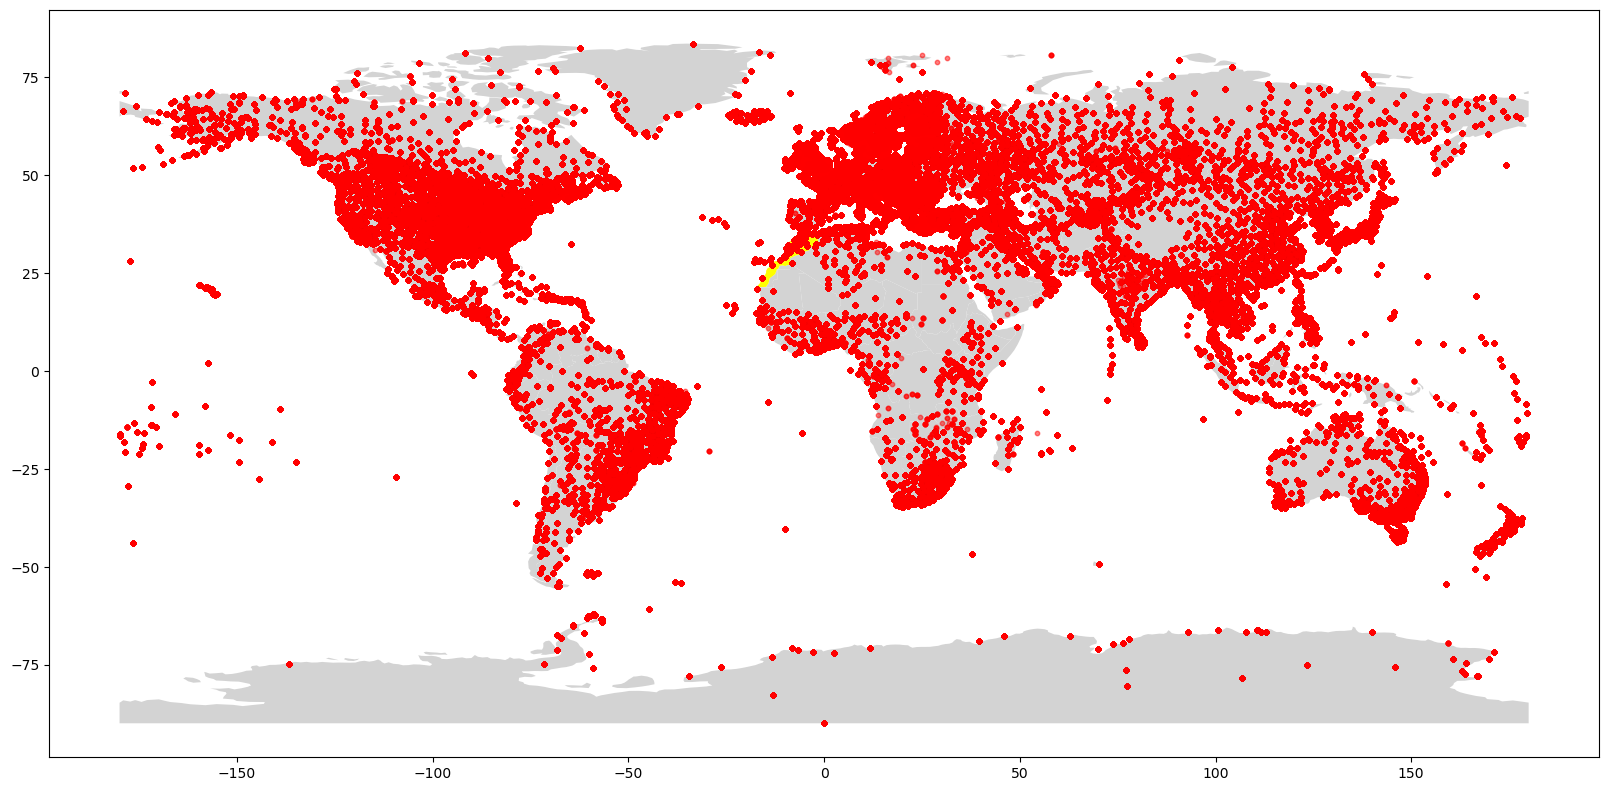

In [35]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Load the shapefile
world = gpd.read_file("./Data/GeoData/SHP/ne_110m_admin_0_countries.shp")

# Filter the GeoDataFrame to get only the shape of Morocco
morocco_shape = world[world['NAME'] == 'Morocco']

# Adjust the color of Morocco
world['color'] = 'lightgray'  # default color
world.loc[world['NAME'] == 'Morocco', 'color'] = 'yellow'  # Morocco color

# Create a GeoDataFrame from your data
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the figure size
fig, ax = plt.subplots(figsize=(20,15))

# Plot the world map with Morocco highlighted
world.plot(ax=ax, color=world['color'])

# Plot the points from your DataFrame on the world map
geo_df.plot(ax=ax, markersize=10, color='red', alpha=0.5)

plt.show()


In [186]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Load the shapefile
world = gpd.read_file("./Data/GeoData/SHP/ne_110m_admin_0_countries.shp")

# Filter the GeoDataFrame to get only the shape of Morocco
morocco_shape = world[world['NAME'] == 'Morocco']

# Create a GeoDataFrame from your data
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the figure size
fig, ax = plt.subplots(figsize=(20,15))

# Plot Morocco
morocco_shape.plot(ax=ax, color='yellow')

# Plot the points from your DataFrame on the Morocco map
geo_df.plot(ax=ax, markersize=10, color='red', alpha=0.5)

# Set the x and y limits to the bounds of Morocco
minx, miny, maxx, maxy = morocco_shape.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()


KeyError: 'LONGITUDE'

In [184]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

# Load the shapefile representing coastlines
coastlines = gpd.read_file("./Data/GeoData/SHP/ne_10m_coastline.shp")

# Create a GeoDataFrame from your data
geometry = [Point(xy) for xy in zip(df['longitude'.upper()], df['latitude'.upper()])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Create a MultiPoint object with the coastlines
coast_multi_point = coastlines.geometry.unary_union

def calculate_distance(row):
    # Create a point based on the row's coordinates
    point = Point(row['longitude'.upper()], row['latitude'.upper()])

    # Find the nearest coastline point to this point
    nearest_geoms = nearest_points(point, coast_multi_point)

    # Return the distance between the point and the nearest coastline point
    return point.distance(nearest_geoms[1])

# Apply the function to each row in the DataFrame
df['distance_to_sea'] = geo_df.apply(calculate_distance, axis=1)


KeyError: 'LONGITUDE'

### Data Sources and Preprocessing

#### Weather Data Collection and Preprocessing

Our study integrates various environmental, meteorological, and human-related factors to predict wildfire occurrences. Weather data, pivotal in assessing conditions conducive to wildfires, is sourced from the Global Surface Summary of the Day (GSOD) dataset provided by NOAA's National Centers for Environmental Information. This dataset encompasses daily meteorological observations from over 9,000 global weather stations, offering a wealth of information on temperature, precipitation, wind speed, and more, dating back to 1929. For our study, we focus on data from Moroccan stations from 2010 to 2023.

**Data Collection Process:**
- Utilizing BigQuery, we extract weather data for all stations in Morocco from the NOAA GSOD dataset, spanning the years 2010 to 2023. This process involves querying the database for each year and consolidating the annual datasets into a single DataFrame.

**Preprocessing Steps:**
- The selected weather data undergoes initial preprocessing, where relevant features such as average temperature, maximum temperature, precipitation, and wind speed are identified and extracted.
- Column names are standardized for clarity and consistency, facilitating easier data manipulation and analysis.
- Missing data points are identified for each station. A comprehensive approach to handling missing data involves interpolating values based on temporal proximity, ensuring a continuous dataset without sacrificing the integrity of the time series.

#### Data Expansion and Integration Techniques

To capture the temporal dynamics influencing wildfire risks, we implement several data expansion and integration techniques:

**Weather Data Expansion:**
- A 15-day lag feature for each meteorological variable is created to encompass the immediate historical context, essential for capturing conditions leading up to wildfire events.
- Weekly, monthly, quarterly, and yearly means are calculated for each variable, providing insights into longer-term climatic trends.

**Integration with Other Datasets:**
- The weather dataset is enriched with additional data, such as human population density, NDVI, and soil moisture levels, through a careful integration process. This multidimensional dataset now reflects a wide array of factors affecting wildfire risks.

**Enhancing Temporal Resolution:**
- To further refine our model's predictive capability, we augment the dataset with lagged features representing the previous 15 days for each meteorological variable, providing a nuanced view of the climatic conditions preceding wildfire occurrences.
- For a deeper temporal context, we also include variables indicating the weather conditions from the previous year, aligning with the same week or month, thereby capturing seasonal climatic variability.

#### Methodological Considerations

The methodological framework for weather data processing and integration into our wildfire prediction model underscores the importance of a detailed, data-driven approach. By meticulously preprocessing, expanding, and integrating weather data with other relevant factors, we establish a robust foundation for our predictive analysis. This comprehensive dataset not only facilitates the understanding of complex interactions among various influences on wildfire occurrences but also enhances the model's accuracy and reliability in forecasting wildfire risks in Morocco.

